# Import package


In [1]:
# Web scraping
from bs4 import BeautifulSoup
import requests
# Data manipulation
import pandas as pd
import numpy as np

# 利用 requests 取得網頁html原始碼

In [2]:
url = 'https://aliceinwonderland.fandom.com/wiki/Turtle_Soup'
page = requests.get(url, params=None)
print(page.status_code)
print(page.ok)

200
True


'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Turtle Soup - Alice in Wonderland Wiki</title>\n<script>document.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );</script>\n<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Turtle_Soup","wgTitle":"Turtle Soup","wgCurRevisionId":12471,"wgRevisionId":12471,"wgArticleId":3971,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Poems","Poems from Alice\'s Adventures in Wonderland"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","
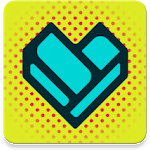
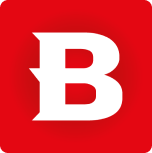

In [3]:
page.encoding #'UTF-8'
page.url #'https://aliceinwonderland.fandom.com/wiki/Turtle_Soup'
page.headers['Content-Type'] #'text/html; charset=UTF-8'
page.content #返回的是bytes型數據，一般適用於圖片、文件。
page.text #返回的是 Unicode型數據，一般適用於字串

# 利用 BeautifulSoup 

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Turtle Soup - Alice in Wonderland Wiki</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Turtle_Soup","wgTitle":"Turtle Soup","wgCurRevisionId":12471,"wgRevisionId":12471,"wgArticleId":3971,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Poems","Poems from Alice's Adventures in Wonderland"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September
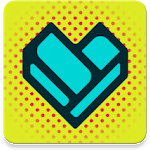
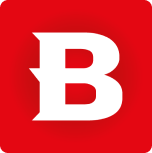

In [4]:
soup = BeautifulSoup(page.text , 'html.parser')
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Turtle Soup - Alice in Wonderland Wiki
  </title>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
  </script>
  <script>
   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Turtle_Soup","wgTitle":"Turtle Soup","wgCurRevisionId":12471,"wgRevisionId":12471,"wgArticleId":3971,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Poems","Poems from Alice's Adventures in Wonderland"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June",
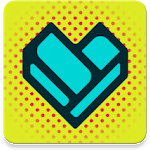
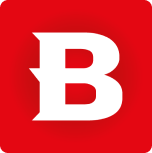

In [5]:
#輸出排版後的HTML程式碼
print(soup.prettify())

In [6]:
soup.title  #<title>Turtle Soup - Alice in Wonderland Wiki</title>
soup.title.name  #'title'
soup.title.string  #'Turtle Soup - Alice in Wonderland Wiki'
soup.title.parent.name  #'head'

'head'

# soup.find_all()之用法

In [7]:
soup.p
soup.a
soup.find_all('a')
soup.find_all('i')

[<i> </i>,
 <i><a href="/wiki/Alice%27s_Adventures_in_Wonderland" title="Alice's Adventures in Wonderland">Alice's Adventures in Wonderland</a></i>,
 <i>Beautiful Soup, so rich and green,</i>,
 <i>Waiting in a hot tureen!</i>,
 <i>Who for such dainties would not stoop?</i>,
 <i>Soup of the evening, beautiful Soup!</i>,
 <i>Soup of the evening, beautiful Soup!</i>,
 <i>Beau--ootiful Soo--oop!</i>,
 <i>Beau--ootiful Soo--oop!<br/></i>,
 <i><br/></i>,
 <i>Beautiful, beautiful Soup</i>,
 <i>Beautiful Soup! Who cares for fish,</i>,
 <i>Game or any other dish?</i>,
 <i>Who would not give all else for two</i>,
 <i>Pennyworth only of Beautiful Soup?</i>,
 <i>Pennyworth only of beautiful Soup?</i>,
 <i>Beau--ootiful Soo--oop!</i>,
 <i>Beau--ootiful Soo--oop!</i>,
 <i>Soo--oop of the e--e--evening,</i>,
 <i>Beautiful, beauti--FUL SOUP!</i>]

In [8]:
for i in soup.find_all("i"):
    print(i)

<i> </i>
<i><a href="/wiki/Alice%27s_Adventures_in_Wonderland" title="Alice's Adventures in Wonderland">Alice's Adventures in Wonderland</a></i>
<i>Beautiful Soup, so rich and green,</i>
<i>Waiting in a hot tureen!</i>
<i>Who for such dainties would not stoop?</i>
<i>Soup of the evening, beautiful Soup!</i>
<i>Soup of the evening, beautiful Soup!</i>
<i>Beau--ootiful Soo--oop!</i>
<i>Beau--ootiful Soo--oop!<br/></i>
<i><br/></i>
<i>Beautiful, beautiful Soup</i>
<i>Beautiful Soup! Who cares for fish,</i>
<i>Game or any other dish?</i>
<i>Who would not give all else for two</i>
<i>Pennyworth only of Beautiful Soup?</i>
<i>Pennyworth only of beautiful Soup?</i>
<i>Beau--ootiful Soo--oop!</i>
<i>Beau--ootiful Soo--oop!</i>
<i>Soo--oop of the e--e--evening,</i>
<i>Beautiful, beauti--FUL SOUP!</i>


In [9]:
for i in soup.find_all(id="WikiaBar"):
    print(i)

<div id="WikiaBar">
<div class="WikiaBarWrapper hidden" id="WikiaBarWrapper">
<div class="wikia-bar wikia-bar-anon">
<a class="wikiabar-button" data-index="0" href="http://bit.ly/SWTriviaWB">
<span>StarWarsTrivia</span>
</a>
<a class="wikiabar-button" data-index="1" href="https://bit.ly/TrekTimeline">
<span>Ad:TrekHistory</span>
</a>
\r">
<span>GalaxyQuest</span>
</a>
<div class="message" data-messagetooltip="Click here for more information!" data-wikiabarcontent='[{"text":"Trillions of Datapoints - Your perfect TV show","href":"http:\/\/bit.ly\/BingeData"},{"text":"Trillions of Datapoints - Your perfect TV show","href":"http:\/\/bit.ly\/BingeData"},{"text":"Trillions of Datapoints - Your perfect TV show","href":"http:\/\/bit.ly\/BingeData"},{"text":"Trillions of Datapoints - Your perfect TV show","href":"http:\/\/bit.ly\/BingeData"},{"text":"Trillions of Datapoints - Your perfect TV show","href":"http:\/\/bit.ly\/BingeData"}]'></div>
<a class="arrow" data-tooltip="Collapse" data-toolt

In [10]:
import re

for i in soup.find_all(text=re.compile("Beautiful")):
    print(i)

Beautiful Soup, so rich and green,
Beautiful, beautiful Soup
Beautiful Soup! Who cares for fish,
Pennyworth only of Beautiful Soup?
Beautiful, beauti--FUL SOUP!


In [11]:
for link in soup.find_all('a'):
    print(link.get('href'))

https://www.fandom.com/
https://www.fandom.com/topics/games
https://www.fandom.com/topics/movies
https://www.fandom.com/topics/tv
https://www.fandom.com/video
https://www.fandom.com/explore
//community.fandom.com/wiki/Community_Central
//ucp.fandom.com/wiki/Special:CreateNewWiki
None
None
https://www.fandom.com/signin?redirect=https%3A%2F%2Faliceinwonderland.fandom.com%2Fwiki%2FTurtle_Soup
https://www.fandom.com/register?redirect=https%3A%2F%2Faliceinwonderland.fandom.com%2Fwiki%2FTurtle_Soup
//ucp.fandom.com/wiki/Special:CreateNewWiki
//aliceinwonderland.fandom.com
//aliceinwonderland.fandom.com
/wiki/Special:CreatePage
#
#
/wiki/Alice%27s_Adventures_in_Wonderland
/wiki/Through_the_Looking-Glass,_and_What_Alice_Found_There
/wiki/Alice%27s_Adventures_Underground
#
/wiki/Jabberwocky
/wiki/How_Doth_the_Little_Crocodile
/wiki/The_Walrus_and_the_Carpenter_(poem)
/wiki/You_Are_Old,_Father_William
/wiki/Humpty_Dumpty%27s_Recitation
/wiki/Turtle_Soup
/wiki/Tis_the_Voice_of_the_Lobster
/wiki/L

In [12]:
soup.find_all("div", class_="WikiaSiteWrapper")

[<div class="WikiaSiteWrapper">
 <div class="banner-notifications-placeholder">
 <div class="wds-banner-notification__container">
 </div>
 </div>
 <div class="WikiaPage">
 <header class="wds-community-header" style="background-image: url(https://static.wikia.nocookie.net/aliceinwonderland/images/0/0e/Community-header-background/revision/latest/zoom-crop/width/471/height/115?cb=20171128231840);">
 <div class="wds-community-header__wordmark" data-tracking="wordmark-image">
 <a accesskey="z" href="//aliceinwonderland.fandom.com">
 <img alt="Alice in Wonderland Wiki" height="65" src="https://vignette4.wikia.nocookie.net/aliceinwonderland/images/8/89/Wiki-wordmark.png/revision/latest?cb=20150521220941" width="250"/>
 </a>
 </div>
 <div class="wds-community-header__top-container">
 <div class="wds-community-header__sitename" data-tracking="sitename">
 <a href="//aliceinwonderland.fandom.com">Alice in Wonderland Wiki</a>
 </div>
 <div class="wds-community-header__counter" data-tracking="count

# requests 介紹

In [13]:
import requests

將想要請求下載的網址傳給get()

## Get 請求

In [14]:
google_url = 'https://www.google.com.tw/'   
google_html = requests.get(google_url)

In [15]:
# 檢查狀態碼是否 OK
if google_html.status_code == requests.codes.ok:
    print("OK")

OK


In [16]:
#google_html.text

In [17]:
google_html

<Response [200]>

## Post請求

In [18]:
url = 'http://httpbin.org/post'
d = {'key1': 'value1', 'key2': 'value2'}
r = requests.post(url, data=d)
print(r.text)

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "key1": "value1", 
    "key2": "value2"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "23", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.24.0", 
    "X-Amzn-Trace-Id": "Root=1-5f8fe31a-5d7acaf058d8fe80090afad7"
  }, 
  "json": null, 
  "origin": "1.174.15.13", 
  "url": "http://httpbin.org/post"
}



<pre>
requests 會主動的幫我們進行解碼，大部分的網頁他都能夠正確的解碼，但也有解碼不正確的時候。
如果發現解碼不正確，就需要自己來手動的指定解碼的編碼格式。
</pre>

In [19]:
#google_html.encoding = '編碼方式'
#google_html.text

## 加入參數

In [20]:
google_url = 'https://www.google.com.tw/'   
## 要加入的參數
my_params = {'key1' : 'value1', 'key2': "value2"}

## 將參數加入 get()請求
requests.get(google_url, params = my_params).url

'https://www.google.com.tw/?key1=value1&key2=value2'

<pre>
在google搜尋後可以看到多了search?q=，而q後面所代的值就是google搜尋欄位輸入的值。
這裡q=ptt，這與直接在url上輸入跟我們在搜尋欄位打入ptt是一樣的，以下是搜尋欄位搜尋的畫面：
</pre>

In [21]:
my_params = {'q': 'ptt'}
google_ptt_html = requests.get("https://www.google.com/search?", params = my_params)

r = requests.get('https://www.google.com/search?q=ptt')

存放html檔在ipynb檔的那層目錄 比較看看一不一樣

In [22]:
with open('./r_searchContent.html', 'w+', encoding="utf-8") as f:
    f.write(r.text)
    print('saved')

saved


In [23]:
with open('./ptt_searchContent.html', 'w+', encoding="utf-8") as f:
    f.write(google_ptt_html.text)
    print('saved')

saved


<pre>
雖然我們也可以自己產生這段 URL，然後直接指定給 requests，不過自己處理的話，還必須注意編碼問題（尤其是有中文字的情況），
所以建議還是交給 requests 統一處理比較省事。
</pre>

## 加入表頭

In [24]:
url = "https://zhuanlan.zhihu.com/"

# 將自訂表頭加入 GET 請求中
r1 = requests.get(url)
r1.ok      ## 知乎這個網站會反爬蟲

False

In [25]:
# 自訂表頭
my_headers = {'user-agent': 'anything'}     
r2 = requests.get(url, headers = my_headers)
r2.ok

True

## .find() 跟 .find_all()

In [26]:
from bs4 import BeautifulSoup

In [27]:
html = """
<html>
<head>
<title>Hello</title>
</head>
<body>
<h2>Test Header</h2>
<p class="a">test1</p>
<p class="b">test2</p>
<p class="c">test3</p>
<a> id="link1" href="/my_link1">Link 1</a>
<a> id="link2" href="/my_link2">Link 2</a>
</body>
</html>
"""
sp = BeautifulSoup(html, "html.parser")

In [28]:
sp.find("p")    # 只會回傳一個

<p class="a">test1</p>

In [29]:
sp.find("p").text    #.text可以取內容

'test1'

In [30]:
# sp.find_all("p").text(錯誤範例) find_all 回傳的是一個array，不能對array做 .text
sp.find_all("p")[0].text

'test1'

以下寫法都相同功能

In [31]:
## 搜尋 h4 且 class為 card-title 的內容
sp.find_all("p", {"class": "a"})
sp.find_all("p", class_ = "a")
sp.find_all("p", "a")

[<p class="a">test1</p>]

## 抓ettoday 台南美食相關文章

In [32]:
response = requests.get(
    "https://travel.ettoday.net/search.php?keywords=%E5%8F%B0%E5%8D%97%E7%BE%8E%E9%A3%9F&idx=1&kind=11&page=1")
tainan_soup = BeautifulSoup(response.text, "html.parser")
print(tainan_soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html itemscope="" itemtype="http://schema.org/ItemList" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="zh-TW" http-equiv="Content-Language"/>
  <link href="//cdn2.ettoday.net/style/travel/images/touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link href="//cdn2.ettoday.net/style/travel/images/touch-icon.png" rel="shortcut icon" sizes="192x192"/>
  <title>
   台南美食相關新聞懶人包, 照片, 影片, 報導, 資訊及訊息-第1頁 | ETtoday旅遊雲 | ETtoday新聞雲
  </title>
  <meta content="台南美食相關新聞懶人包, 照片, 影片, 報導, 資訊及訊息" name="description"/>
  <!-- facebook 專用-->
  <meta content="zh_TW" property="og:locale"/>
  <meta content="146858218737386" property="fb:app_id"/>
  <meta content="ETtoday 旅遊雲" property="og:site_name"/>
  <meta content="https://www.facebook.com/ETtodayTRAVEL" prope

In [33]:
articles = tainan_soup.find("div", {"class": "part_pictxt_1"})
titles = articles.find_all("h3")
for title in titles:
    print(title.find('a').text)
    print(title.find('a').get('href'))

從肉燥飯到擔仔麵！台南肉燥攻略地圖收錄700家店　用手機就能查
https://travel.ettoday.net/article/1834957.htm
在地人超愛！台南廟前「臭豆腐」超酥脆　一周賣4天還要拿號碼牌
https://travel.ettoday.net/article/1833080.htm
豬油拌飯＋半熟蛋太欠吃！台南巷弄老宅居酒屋　烤豬排嫩又多汁
https://travel.ettoday.net/article/1825730.htm
濃縮義式＋冰淇淋超療癒！台南新開質感咖啡店　還吃得到脆脆司康
https://travel.ettoday.net/article/1800574.htm
大骨湯免費喝到飽！台南人氣無名麵店　陽春麵＋滿滿麻醬一吃上癮
https://travel.ettoday.net/article/1795416.htm
9隻天使紅蝦＋鮭魚卵鋪滿飯上！台南巷弄日料　鮮蚵沙拉超邪惡
https://travel.ettoday.net/article/1790364.htm
料多、湯鮮甜！台南邪惡干貝海鮮粥　蒜蓉蟹肉＋洋蔥爆炒肥美
https://travel.ettoday.net/article/1789471.htm
漫遊七夕鵲橋！三重蘆洲吃玩攻略　滷肉飯鋪鮮蚵＋蒜泥白肉超過癮
https://travel.ettoday.net/article/1792604.htm
快訊／東京米其林二星姐妹店logy摘二星　菜色台灣味搶戲
https://travel.ettoday.net/article/1792064.htm


## 從台灣銀行抓取匯率

In [34]:
foreign_exchange_url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
html_bank = requests.get(foreign_exchange_url)

sp = BeautifulSoup(html_bank.text, "html.parser")

data = sp.find("table", {"class","table table-striped table-bordered table-condensed table-hover"})

In [35]:
print(data)

<table class="table table-striped table-bordered table-condensed table-hover" summary="此表格是牌告匯率，表格分為七直欄，第一直欄是幣別，第二直欄是本行買入現金匯率，第三直欄是本行賣出現金匯率，第四直欄是本行買入即期匯率，第五直欄是本行賣出即期匯率，第六直欄是遠期匯率連結，第七直欄是歷史匯率連結。" title="牌告匯率">
<thead class="phone-medium-font">
<tr>
<th class="print_width set-title-L-min-width-class noscript" rowspan="2">幣別</th>
<th class="print_width rowSP_Ctrl_2_2_2 set-title-L-min-width-class hasscript">幣別</th>
<th class="print_hide rate-content-cash" colspan="2">現金匯率</th>
<th class="hidden"></th>
<th class="print_hide rate-content-sight" colspan="2">即期匯率</th>
<th class="hidden"></th>
<th class="print_hide" rowspan="2">
<span class="">遠期匯率</span>
</th>
<th class="print_hide noscript" rowspan="2">歷史匯率</th>
<th class="print_hide rowSP_Ctrl_2_2_2 hasscript">歷史匯率</th>
<th class="display_none_print_show print_width" colspan="2">現金匯率</th>
<th class="hidden"></th>
<th class="display_none_print_show print_width" colspan="2">即期匯率</th>
<th class="hidden"></th>
</tr>
<tr>
<th class="hidden"></th>

觀察想爬取的資料的標籤和class(CSS),想抓取幣別跟現金匯率：

In [36]:
currency_name = data.find_all("div",{"class", "visible-phone print_hide"})
cash_rate = data.find_all("td",{"class", "rate-content-cash text-right print_hide"})
for i in range(0, len(currency_name)):
    print(currency_name[i].text.strip())

美金 (USD)
港幣 (HKD)
英鎊 (GBP)
澳幣 (AUD)
加拿大幣 (CAD)
新加坡幣 (SGD)
瑞士法郎 (CHF)
日圓 (JPY)
南非幣 (ZAR)
瑞典幣 (SEK)
紐元 (NZD)
泰幣 (THB)
菲國比索 (PHP)
印尼幣 (IDR)
歐元 (EUR)
韓元 (KRW)
越南盾 (VND)
馬來幣 (MYR)
人民幣 (CNY)


In [37]:
currency = []
for i in range(0, len(currency_name)):
    currency.append(currency_name[i].text.strip())  ### .strip()去除前後空白
print(currency)    

['美金 (USD)', '港幣 (HKD)', '英鎊 (GBP)', '澳幣 (AUD)', '加拿大幣 (CAD)', '新加坡幣 (SGD)', '瑞士法郎 (CHF)', '日圓 (JPY)', '南非幣 (ZAR)', '瑞典幣 (SEK)', '紐元 (NZD)', '泰幣 (THB)', '菲國比索 (PHP)', '印尼幣 (IDR)', '歐元 (EUR)', '韓元 (KRW)', '越南盾 (VND)', '馬來幣 (MYR)', '人民幣 (CNY)']


In [38]:
for i in range(0, len(cash_rate)):
    print(cash_rate[i].text.strip())
    
# 觀察抓取的順序 發現是 買入 賣出 買入 賣出 ...  

28.25
28.92
3.54
3.744
36.08
38.2
19.87
20.65
21.36
22.27
20.57
21.48
30.84
32.04
0.2633
0.2761
-
-
2.9
3.42
18.47
19.32
0.7896
0.9796
0.5167
0.6497
0.00163
0.00233
33.15
34.49
0.02356
0.02746
0.00086
0.00136
5.803
7.428
4.22
4.382


In [39]:
cash_buy = []
cash_sell = []
for i in range(0, len(cash_rate)):
    if (i % 2) == 0:
        cash_buy.append(cash_rate[i].text)
    else :
        cash_sell.append(cash_rate[i].text)
print(cash_buy)
print(cash_sell)   

['28.25', '3.54', '36.08', '19.87', '21.36', '20.57', '30.84', '0.2633', '-', '2.9', '18.47', '0.7896', '0.5167', '0.00163', '33.15', '0.02356', '0.00086', '5.803', '4.22']
['28.92', '3.744', '38.2', '20.65', '22.27', '21.48', '32.04', '0.2761', '-', '3.42', '19.32', '0.9796', '0.6497', '0.00233', '34.49', '0.02746', '0.00136', '7.428', '4.382']


In [40]:
import pandas as pd
dict = {"currency_name": currency,  
        "cash_buy": cash_buy,
        "cash_sell": cash_sell
       }
df = pd.DataFrame(dict)
print(df)

   currency_name cash_buy cash_sell
0       美金 (USD)    28.25     28.92
1       港幣 (HKD)     3.54     3.744
2       英鎊 (GBP)    36.08      38.2
3       澳幣 (AUD)    19.87     20.65
4     加拿大幣 (CAD)    21.36     22.27
5     新加坡幣 (SGD)    20.57     21.48
6     瑞士法郎 (CHF)    30.84     32.04
7       日圓 (JPY)   0.2633    0.2761
8      南非幣 (ZAR)        -         -
9      瑞典幣 (SEK)      2.9      3.42
10      紐元 (NZD)    18.47     19.32
11      泰幣 (THB)   0.7896    0.9796
12    菲國比索 (PHP)   0.5167    0.6497
13     印尼幣 (IDR)  0.00163   0.00233
14      歐元 (EUR)    33.15     34.49
15      韓元 (KRW)  0.02356   0.02746
16     越南盾 (VND)  0.00086   0.00136
17     馬來幣 (MYR)    5.803     7.428
18     人民幣 (CNY)     4.22     4.382


## 爬取證交所網站上的資料

如果我們訪問之後獲得的資料是JSON格式的，那麼我們可以使用json()方法，直接獲取轉換成字典格式的資料，或是json.loads()讀取成json的格式

In [41]:
import json
import csv

In [42]:
url_twse = "https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=20201019&stockNo=2330"
html_twse = requests.get(url_twse)
html_twse.text

'{"stat":"OK","date":"20201019","title":"109年10月 2330 台積電           各日成交資訊","fields":["日期","成交股數","成交金額","開盤價","最高價","最低價","收盤價","漲跌價差","成交筆數"],"data":[["109/10/05","33,238,832","14,450,407,588","438.00","438.00","431.50","432.50","-0.50","18,148"],["109/10/06","36,276,395","15,935,558,262","441.50","442.00","437.50","439.50","+7.00","20,189"],["109/10/07","44,691,239","19,693,987,093","435.00","445.00","435.00","443.00","+3.50","24,438"],["109/10/08","60,853,811","27,461,867,933","450.00","454.00","448.50","453.00","+10.00","37,378"],["109/10/12","67,645,223","31,061,721,030","458.00","462.00","457.50","460.00","+7.00","36,118"],["109/10/13","46,303,738","21,346,346,714","465.00","465.00","456.50","462.00","+2.00","25,938"],["109/10/14","52,677,241","24,157,138,176","460.50","461.00","457.00","459.00","-3.00","22,599"],["109/10/15","49,987,278","22,668,836,399","456.00","456.50","450.00","453.00","-6.00","23,794"],["109/10/16","48,274,801","21,775,749,575","451.00","456.00","448.50","

In [43]:
s = json.loads(html_twse.text)

In [44]:
for data in (s["data"]):
    print(data)

['109/10/05', '33,238,832', '14,450,407,588', '438.00', '438.00', '431.50', '432.50', '-0.50', '18,148']
['109/10/06', '36,276,395', '15,935,558,262', '441.50', '442.00', '437.50', '439.50', '+7.00', '20,189']
['109/10/07', '44,691,239', '19,693,987,093', '435.00', '445.00', '435.00', '443.00', '+3.50', '24,438']
['109/10/08', '60,853,811', '27,461,867,933', '450.00', '454.00', '448.50', '453.00', '+10.00', '37,378']
['109/10/12', '67,645,223', '31,061,721,030', '458.00', '462.00', '457.50', '460.00', '+7.00', '36,118']
['109/10/13', '46,303,738', '21,346,346,714', '465.00', '465.00', '456.50', '462.00', '+2.00', '25,938']
['109/10/14', '52,677,241', '24,157,138,176', '460.50', '461.00', '457.00', '459.00', '-3.00', '22,599']
['109/10/15', '49,987,278', '22,668,836,399', '456.00', '456.50', '450.00', '453.00', '-6.00', '23,794']
['109/10/16', '48,274,801', '21,775,749,575', '451.00', '456.00', '448.50', '449.00', '-4.00', '26,602']
['109/10/19', '34,846,906', '15,854,021,670', '453.00'

將json資料依照想要的格式寫入csv檔

In [45]:
outputfile = open("exchangeReport_json.csv", "w", newline = '')
outputwriter = csv.writer(outputfile)
outputwriter.writerow(s['title'])
outputwriter.writerow(s['fields'])
for data in (s['data']):
    outputwriter.writerow(data)

outputfile.close()

## 正規表達法(Rogex)

<pre>
Beautiful Soup使用時，一般可以通過指定對應的name和attrs去搜尋，特定的名字和屬性，以找到所需要的部分的html程式碼。

但是有時候會遇到，對於要處理的內容中，其name或attr的值有多種可能，尤其是符合某一規律，此時就無法寫成固定的值了。
</pre>

In [46]:
import re

In [47]:
resp = requests.get('http://jwlin.github.io/py-scraping-analysis-book/ch2/blog/blog.html')
soup = BeautifulSoup(resp.text, 'html.parser')

In [48]:
# 找出所有 'h' 開頭的標題文字
titles = soup.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6'])
for title in titles:
    print(title.text.strip())

Python教學文章
開發環境設定
Mac使用者
資料科學
給初學者的 Python 網頁爬蟲與資料分析
資料科學
給初學者的 Python 網頁爬蟲與資料分析
資料科學
給初學者的 Python 網頁爬蟲與資料分析
資料科學
給初學者的 Python 網頁爬蟲與資料分析
資料科學
給初學者的 Python 網頁爬蟲與資料分析


In [49]:
# 利用 regex 找出所有 'h' 開頭的標題文字
for title in soup.find_all(re.compile('h[1-6]')):
    print(title.text.strip())

Python教學文章
開發環境設定
Mac使用者
資料科學
給初學者的 Python 網頁爬蟲與資料分析
資料科學
給初學者的 Python 網頁爬蟲與資料分析
資料科學
給初學者的 Python 網頁爬蟲與資料分析
資料科學
給初學者的 Python 網頁爬蟲與資料分析
資料科學
給初學者的 Python 網頁爬蟲與資料分析
